# Exploratory Data Anaysis on Haberman Dataset

## - Description of Haberman dataset

"Information source: https://www.kaggle.com/gilsousa/habermans-survival-data-set"

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

1) The Number of datapoints= 306

2) The Number of Features=4 (including class labels)

3) Feature Inromation Information:

    a) Age of patient at time of operation (numerical)
    b) Patient's year of operation (year - 1900, numerical)
    c) Number of positive axillary nodes detected(Lymph Nodes)(numerical)
    d) Survival status (class attribute) 1 = the patient survived 5 years or longer 
                                         2 = the patient died within 5 year

### 1. Reading Data

In [2]:
#%config IPCompleter.greedy=True
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas Data Frame
haberman_df= pd.read_csv("haberman.csv")
haberman_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# The number of datapoints and features in haberman dataset
print("The number of datpoints and features in haberman dataset=",haberman_df.shape)

The number of datpoints and features in haberman dataset= (306, 4)


In [4]:
# The feature name in haberman dataset
print(haberman_df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


### 2. Data Analysis

In [5]:
 #First remane column "status" with "survival_status" code ref:  https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
haberman_df.rename(columns={'status':'survival_status'},inplace=True)

#Replace class label 1='Yes' and 2='No' for convenience 
haberman_df['survival_status'].replace(1, "Yes", inplace=True)
haberman_df['survival_status'].replace(2, "No", inplace=True)

#The number of Datapoints for each class:
print("Number of Datapoints for each class:")
print("Yes= the patient survived 5 years or longer, No= the patient died within 5 year ")

haberman_df.survival_status.value_counts()


Number of Datapoints for each class:
Yes= the patient survived 5 years or longer, No= the patient died within 5 year 


Yes    225
No      81
Name: survival_status, dtype: int64

**Observation:**
    
   *Haberman dataset is a imbalanced dataset*. (The number of patients survied for 5 years or longer= 255 and number of patients died within 5 year= 81).

### 3. Objective :
                To predict whether the patient will survive after 5 year or not given a patients who had undergone surgery for breast cancer.

### 4. Univariate analysis (PDF,CDF,Boxplot, Voilin Plot)

In this section, we will perform univaraite analysis on each feature

#### 4.1 Univariate analysis : age

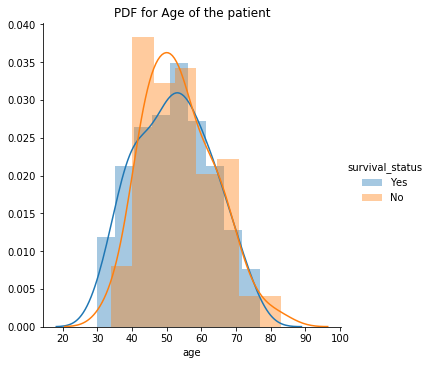

In [6]:
# Plot PDF using age feature
sns.FacetGrid(haberman_df,hue="survival_status",height=5).map(sns.distplot,"age").add_legend()
plt.title("PDF for Age of the patient")
plt.show()

**Observation:**
    
        1)From above plot, PDF for both classes are overlapping each other. 
        2)We can not predict survial status of the patient based on Age feature.   
        3)But,We can see that 33% of patient whose age is in range of (50-60) years are died as well as survied.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


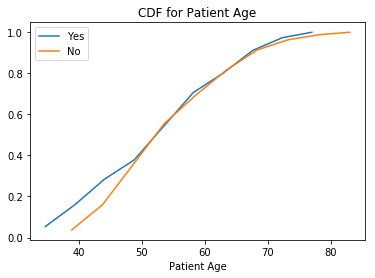

In [7]:

survied_Yes = haberman_df.loc[haberman_df["survival_status"] == "Yes"];
survied_No = haberman_df.loc[haberman_df["survival_status"] == "No"];

# Dwawing CDF using age feature
counts_age, bin_edges_age= np.histogram(survied_Yes['age'], bins=10, density = True)
pdf_age=counts_age/sum(counts_age)
print(pdf_age)
print(bin_edges_age)
cdf_age=np.cumsum(pdf_age)
plt.plot(bin_edges_age[1:],cdf_age, label="Yes")
plt.xlabel("Patient Age")

counts_age, bin_edges_age= np.histogram(survied_No['age'], bins=10, density = True)
pdf_age=counts_age/sum(counts_age)
print(pdf_age)
print(bin_edges_age)
cdf_age=np.cumsum(pdf_age)
plt.plot(bin_edges_age[1:],cdf_age, label="No")
plt.xlabel("Patient Age")

plt.title("CDF for Patient Age")
plt.legend()
plt.show()

**Observation:**
    
        1)The CDFs are almost overlapping.

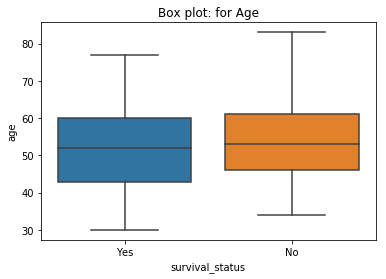

In [8]:
#Box Plot for Age feature
sns.boxplot(x='survival_status',y='age',data=haberman_df)
plt.title("Box plot: for Age")
plt.show()

**Observation:**
    
           1) We can see that 50th percentile for both the classes is almost similar   
           2) The minimum age of the patient who survied is 30 year   
           

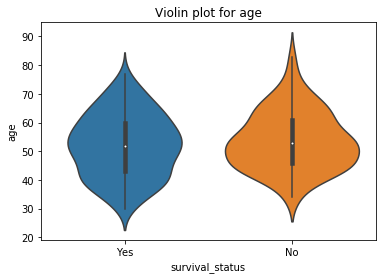

In [9]:
# Violing plot for age
sns.violinplot(x="survival_status",y='age',data=haberman_df)
plt.title("Violin plot for age")
plt.show()

**Observation:**
    
           1)From Violin plot , we can observe that 50th percentile of both the classes is aproximately 52 year.
           2)Also, Density of Violin plot looks almost similar for both the classes.
                    

**Summary:**
    
           1) From above univariate analysis it very hard to conclude the patient survival status based on age   feature. As there is massive overlapp in PDF.
           2) Age feature may not be the useful feature to classify patient surviaval status.
           

#### 4.2 Univariate analysis : year

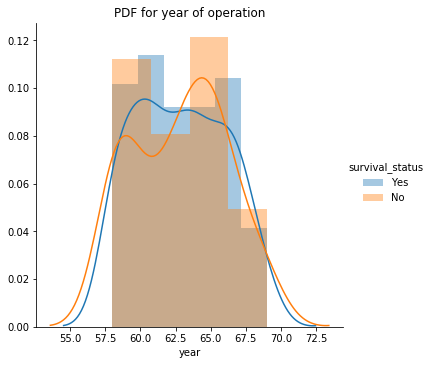

In [10]:
#Code to draw a PDF
sns.FacetGrid(haberman_df,hue="survival_status",height=5).map(sns.distplot,"year").add_legend()
plt.title("PDF for year of operation")
plt.show()

**Observation:**
    
           1) From above plot, it is very hard to predict patient survival status based on year of operation.           

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


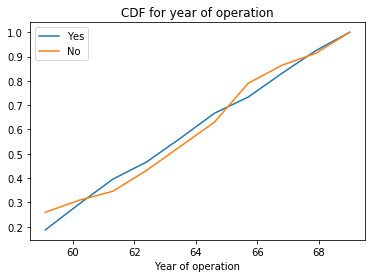

In [11]:
# Code to plot CDF using year feature
counts_year, bin_edges_year= np.histogram(survied_Yes['year'], bins=10, density = True)
pdf_year=counts_year/sum(counts_year)
print(pdf_year)
print(bin_edges_year)
cdf_year=np.cumsum(pdf_year)
plt.plot(bin_edges_year[1:],cdf_year, label="Yes")
plt.xlabel("Year of operation")

counts_year, bin_edges_age= np.histogram(survied_No['year'], bins=10, density = True)
pdf_year=counts_year/sum(counts_year)
print(pdf_year)
print(bin_edges_year)
cdf_year=np.cumsum(pdf_year)
plt.plot(bin_edges_year[1:],cdf_year, label="No")
plt.xlabel("Year of operation")

plt.title("CDF for year of operation")
plt.legend()
plt.show()

**Observation:**
    
           1) Almost 90% of operations were done before 1967

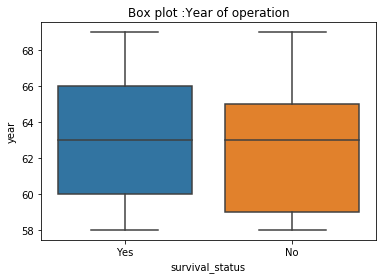

In [12]:
#Box plot using year
sns.boxplot(x='survival_status',y='year',data=haberman_df)
plt.title("Box plot :Year of operation")
plt.show()

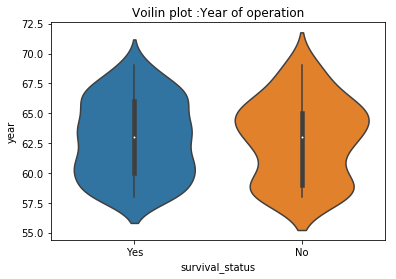

In [13]:
#Vioilin plot : Year
sns.violinplot(x='survival_status',y='year',data=haberman_df)
plt.title("Voilin plot :Year of operation")
plt.show()

**Observation:**
    
           1) From Box Plot and Violin plot, the 50th percentile for both the classes is aproxmatiely 63 years
          

**Summary:**
    
           1)From above univaraite analysis, Year of operation could not be the userful feature to predict patient survival status.

#### 4.3 Univariate analysis : nodes

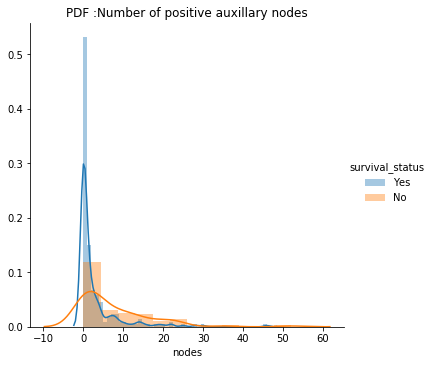

In [14]:
# plot pdf for number of positive auxillary nodes
sns.FacetGrid(haberman_df,hue="survival_status",height=5).map(sns.distplot,"nodes").add_legend()
plt.title("PDF :Number of positive auxillary nodes")
plt.show()

**Observation:**
    
           1) PDFs are also not well separated.
           2) But, The patient with number of positve auxillary nodes= 0,1 or 2 are more likely to survive.
           3) and there is very less chance of survival if Number of positive auxillary nodes are more than 20.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


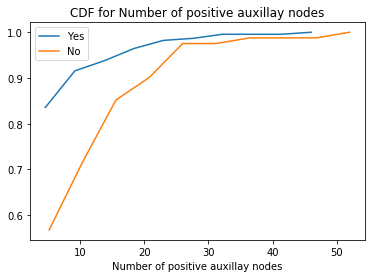

In [15]:
counts_nodes, bin_edges_nodes= np.histogram(survied_Yes['nodes'], bins=10, density = True)
pdf_nodes=counts_nodes/sum(counts_nodes)
print(pdf_nodes)
print(bin_edges_nodes)
cdf_nodes=np.cumsum(pdf_nodes)
plt.plot(bin_edges_nodes[1:],cdf_nodes, label="Yes")
plt.xlabel("Number of positive auxillay nodes")

counts_nodes, bin_edges_nodes= np.histogram(survied_No['nodes'], bins=10, density = True)
pdf_nodes=counts_nodes/sum(counts_nodes)
print(pdf_nodes)
print(bin_edges_nodes)
cdf_nodes=np.cumsum(pdf_nodes)
plt.plot(bin_edges_nodes[1:],cdf_nodes, label="No")
plt.xlabel("Number of positive auxillay nodes")

plt.title("CDF for Number of positive auxillay nodes")
plt.legend()
plt.show()

**Observation:**
    
           1) Almost 84% of patients survived with number of positive auxillary nodes <= 2.

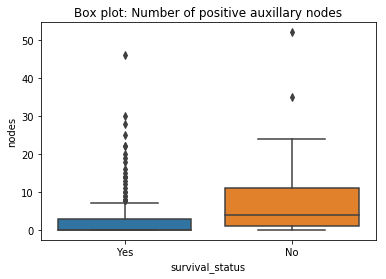

In [16]:
#Box plot : Number of positive auxillary nodes
sns.boxplot(x='survival_status',y='nodes',data=haberman_df)
plt.title("Box plot: Number of positive auxillary nodes")
plt.show()

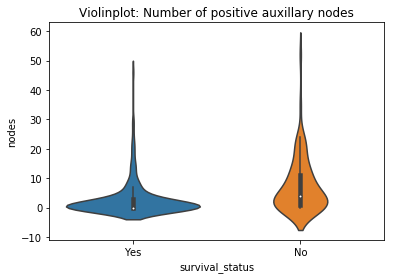

In [17]:
#Violin plot : nodes
sns.violinplot(x='survival_status',y='nodes',data=haberman_df)
plt.title("Violinplot: Number of positive auxillary nodes")
plt.show()

**Observation:**
    
           1) There is less chance of survival if Number of possitivie auxillary nodes are more than 2.
           2) Most patients survived with number of positive auxillay node =0. But small percentalge of people also died whose number of positive auxillay nodes=0.
           3) Patient with small number of positive auxillay nodes does not always guaranteed the survival. 
        

**Summary:**

        1) Number of positive auxillary node could be one of the useful feature.
        
        2) But,The PDFs are overlapping each other, we can not separate the patients based on number of positive auxillary nodes.

### 5. Bi-variate analysis (Scatter plot, pair plot)

In this section, we will perform bi-varaite analysis on combinations of feature

#### 5.1 Bi-variate analysis : age ,year

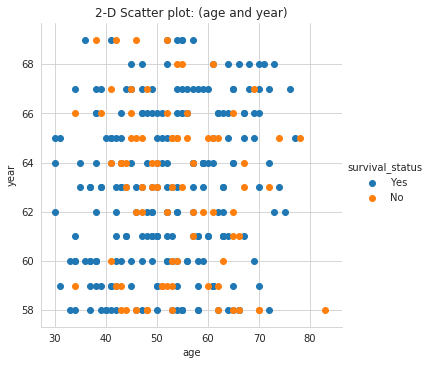

In [18]:
#scatter plot with color-coding for each class.
sns.set_style("whitegrid");
sns.FacetGrid(haberman_df,hue="survival_status",height=5).map(plt.scatter,"age","year").add_legend();
plt.title("2-D Scatter plot: (age and year)")
plt.show()

**Observation:**

       1) We can not say anything from above plot as points are scattered all around the space.

#### 5.2 Bi-variate analysis : year, nodes

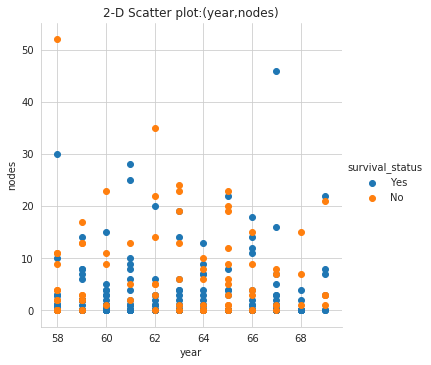

In [19]:
#Scatter plot: (year, nodes)
sns.set_style("whitegrid");
sns.FacetGrid(haberman_df,hue="survival_status",height=5).map(plt.scatter,"year","nodes").add_legend();
plt.title("2-D Scatter plot:(year,nodes)")
plt.show()

**Observation:**

       1) Points are not linearly seperable.

#### 5.3 Bi-variate analysis : age, nodes

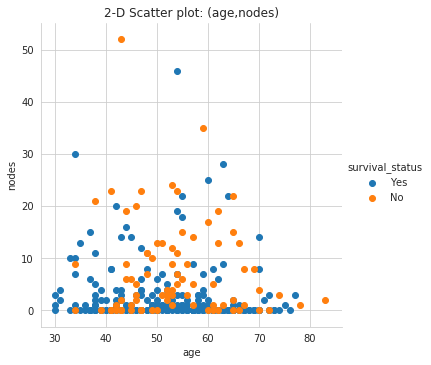

In [20]:
# Scatter plot :(age,nodes)
sns.set_style("whitegrid");
sns.FacetGrid(haberman_df,hue="survival_status",height=5).map(plt.scatter,"age","nodes").add_legend();
plt.title("2-D Scatter plot: (age,nodes)")
plt.show()

**Obeservation:**

       1) We can observe,There is very high chance of surivival if Patients had 0 or 1 positive auxillary nodes with age range between (30-65) year.
       2) There are very less number of patients with number of positive auxillay nodes more the 25.
       3) Most of patients died with more than 5 positive auxillay nodes and age more than 50. 

#### 3.6 Bi-variate analysis : Pair Plot

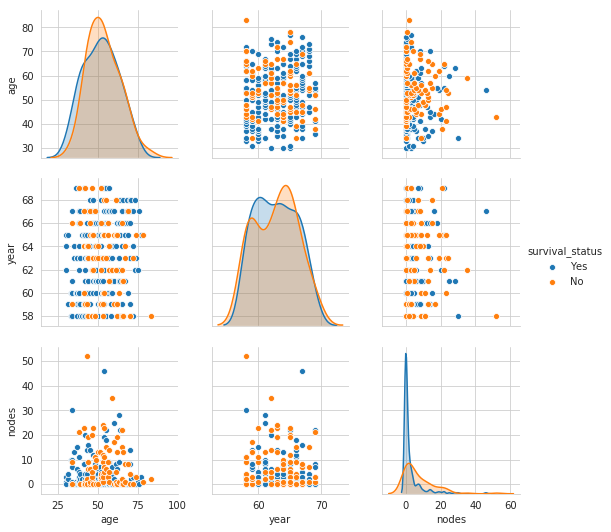

In [21]:
#Pair-plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman_df, hue="survival_status")
plt.show()

**Observation:**
    
           1) Age and Nodes could be the better combination of features in 2-dim.

### 5. Conclusion

        1) Number of positive auxillay nodes is better feature in 1-dim.
        
        2) Combination of age and nodes could be good feature in 2-dim.
        
        3) The given dataset is imbalanced.
        
        4) We could not able to sepeate datapoints. It is difficult to classify survival status of the patient based on given features.